In [2]:
import json
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
dataset_path = '../../data/fashion_products_dataset.json'
with open(dataset_path, 'r') as file:
    data = json.load(file)

In [4]:
def extract_product_details(details):
    """
    Extracts only the descriptive values from structured product_details.
    Example input: [{"Color": "Blue"}, {"Material": "Cotton"}]
    Output: "Blue Cotton"
    """
    values = []
    for category in details:
        values.extend(v for v in category.values())
    return " ".join(values)

In [5]:
def build_terms(document):
    """
    Preprocess the document text (title + description + product_details extracted) removing stop words, stemming,
    transforming in lowercase and return the tokens of the text.

    Argument:
    document -- a dictionary with 'title' and 'description' keys

    Returns:
    tokens - a list of tokens corresponding to the input text after the preprocessing
    """
    # 1. Stemmer and stop words
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))

    # 2. Text
    text = document['title'] + ' ' + document['description'] + ' ' + extract_product_details(document['product_details'])
    text = text.lower()
    text = ''.join(char if char.isalnum() or char.isspace() else ' ' for char in text)
    text = text.split(" ")
    text = [term for term in text if term not in stop_words]
    text = [term for term in text if term != '']
    text = [stemmer.stem(term) for term in text]

    return text

In [6]:
def build_metadata(document):
    """
    Preprocess the document other fields (category, sub_category, brand, seller) removing stop words,
    transforming in lowercase and return the tokens of the text.

    Argument:
    document -- a dictionary with 'category', 'sub_category', 'brand', 'seller' keys

    Returns:
    tokens - a list of tokens corresponding to the input text after the preprocessing
    """
    # 1. Stop words
    stop_words = set(stopwords.words('english'))

    # 2. Text
    text = document['category'] + ' ' + document['sub_category'] + ' ' + document['brand'] + ' ' + document['seller']
    text = text.lower()
    text = ''.join(char if char.isalnum() or char.isspace() else ' ' for char in text)
    text = text.split(" ")
    text = [term for term in text if term not in stop_words]
    text = [term for term in text if term != '']

    return text

In [7]:
def preprocess_document(document):
    """""
    Process the document
    1. Build the tokens of the document
    2. Build the metadata tokens of the document
    3. Build the original attributes of the document
    """

    # 1. Searchable tokens
    tokens = build_terms(document)

    # 2. Metadata tokens
    metadata = build_metadata(document)

    # 3. Original attributes
    original = {
        "pid": document["pid"],
        "title": document["title"],
        "description": document["description"],
        "brand": document["brand"],
        "category": document["category"],
        "sub_category": document["sub_category"],
        "product_details": document["product_details"],
        "seller": document["seller"],
        "out_of_stock": document["out_of_stock"],
        "selling_price": document["selling_price"],
        "discount": document["discount"],
        "actual_price": document["actual_price"],
        "average_rating": document["average_rating"],
        "url": document["url"]
    }
    return {
        "searchable_text": tokens,
        "metadata": metadata,
        "original": original
    }

In [11]:
print("Processing corpus...")
preprocessed_data = [preprocess_document(doc) for doc in data]
print(f"Total processed products: {len(preprocessed_data)}")

print("="*70)
print("PROCESSED DOCUMENT EXAMPLE")
print("="*70)

sample = preprocessed_data[0]

print(f"\n1. SEARCHABLE TEXT {len(sample['searchable_text'])} tokens):")
print(f"   First 15 tokens: {sample['searchable_text'][:15]}")

print(f"\n2. METADATA:")
print(f"   {sample['metadata']}")

print(f"\n3. ORIGINAL:")
print(f"   PID: {sample['original']['pid']}")
print(f"   Title: {sample['original']['title']}")
print(f"   Price: {sample['original']['selling_price']}")
print(f"   Rating: {sample['original']['average_rating']}")
print(f"   Out of stock: {sample['original']['out_of_stock']}")

Processing corpus...
Total processed products: 28080
PROCESSED DOCUMENT EXAMPLE

1. SEARCHABLE TEXT 38 tokens):
   First 15 tokens: ['solid', 'women', 'multicolor', 'track', 'pant', 'yorker', 'trackpant', 'made', '100', 'rich', 'comb', 'cotton', 'give', 'rich', 'look']

2. METADATA:
   ['clothing', 'accessories', 'bottomwear', 'york', 'shyam', 'enterprises']

3. ORIGINAL:
   PID: TKPFCZ9EA7H5FYZH
   Title: Solid Women Multicolor Track Pants
   Price: 921
   Rating: 3.9
   Out of stock: False


Part 2: Data Analysis and Visualization

Vocabulary Size: 20906


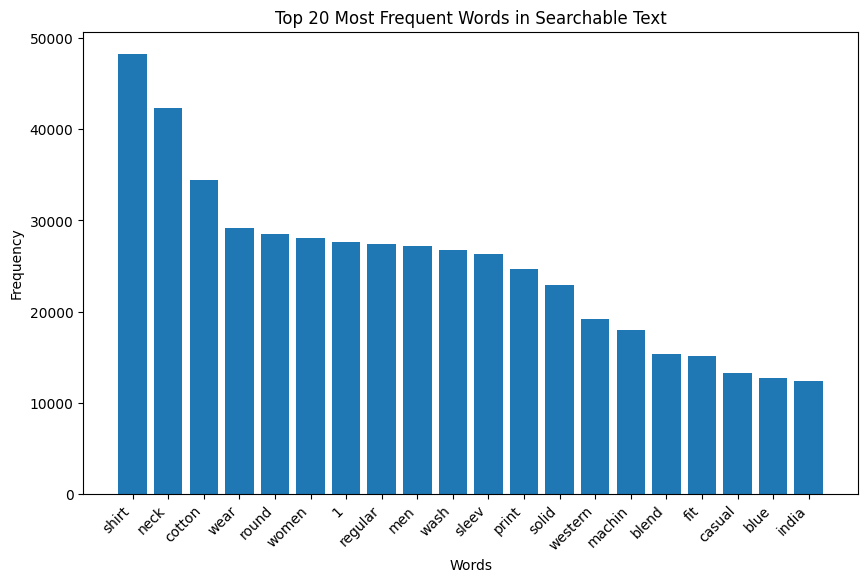

In [12]:
from collections import Counter

import matplotlib.pyplot as plt

# Flatten the list of tokens from all documents
all_tokens = [token for doc in preprocessed_data for token in doc['searchable_text']]

# Count the frequency of each word
word_counts = Counter(all_tokens)

print(f"Vocabulary Size: {len(word_counts)}")

# Get the most common words
most_common_words = word_counts.most_common(20)

# Plot the word counting distribution
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Most Frequent Words in Searchable Text')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()